<a id='wrang'></a>
# 1. Data Wrangling

In [1]:
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics.pairwise import _euclidean_distances
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn  as sns
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import pickle

%matplotlib inline
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
#importing raw data
df2= pd.read_csv("C://Users//ahmed.saeed//Desktop//Job_Risk//Job_Risk//Profitability//df2_JOB_RISK2.csv", sep=',', low_memory=False)
df2

,Unnamed: 0,Brand,Unit,Job_type,Subject,Delay,Language_Pair,Start_TimeStamp,Price,Deivery_TimeStamp,amount,Duration,PM,Account,feedback,profitability
0,0,13,4,12,22,0,274,1182.42,0.00,1182.67,2.50,0.25,34,8089,0,0
1,1,0,4,12,22,0,710,1182.39,0.00,1182.50,0.25,0.11,166,5301,1,0
2,2,13,10,24,22,0,44,1182.38,30.57,1182.51,401.00,0.13,114,673,0,2
3,3,6,10,22,32,0,452,1182.36,0.46,1182.46,7.00,0.10,164,4448,0,2
4,4,13,10,24,22,1,44,1182.34,7.47,1182.36,98.00,0.02,114,673,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317378,327338,8,10,25,22,0,624,-113.46,7.40,1.67,123.33,115.13,63,7846,0,2
317379,327339,11,4,12,52,1,274,-237.54,30.00,-237.33,1.00,0.21,10,5445,0,2
317380,327340,11,4,23,22,1,298,-313.71,22.00,-313.33,1.00,0.38,10,5809,0,2
317381,327341,6,4,12,22,1,650,-452.71,94.12,-452.33,2.27,0.38,5,5234,0,2


In [4]:
filename = 'C://Users//ahmed.saeed//Desktop//Job_Risk//Job_Risk//Profitability//rf_model_fitted_profitability.sav'
rf_model = pickle.load(open(filename, 'rb'))


C:\Users\ahmed.saeed\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\ahmed.saeed\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
# Introduing features and label
X = df2[['Brand', 'Unit', 'Job_type','Subject', 'Language_Pair','Start_TimeStamp',
         'Price','Deivery_TimeStamp','amount','Duration', 'PM', 'Account']]
y = np.array(df2["profitability"]).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)


# Step 3. – Making predictions with our model

In [6]:
y_pred = rf_model.predict(X_test)
y_pred

array([2, 2, 0, ..., 2, 2, 2])

In [7]:
y_test

array([2, 2, 0, ..., 1, 2, 1])

In [8]:
prob = rf_model.predict_proba(X_test)
prob

array([[0.01, 0.12, 0.87],
       [0.02, 0.07, 0.91],
       [0.67, 0.33, 0.  ],
       ...,
       [0.01, 0.07, 0.92],
       [0.02, 0.43, 0.55],
       [0.14, 0.37, 0.49]])

In [9]:
rf_model.classes_

array([0, 1, 2])

              precision    recall  f1-score   support

           0       0.74      0.61      0.67      8382
           1       0.80      0.85      0.82     33417
           2       0.80      0.78      0.79     21678

    accuracy                           0.79     63477
   macro avg       0.78      0.75      0.76     63477
weighted avg       0.79      0.79      0.79     63477



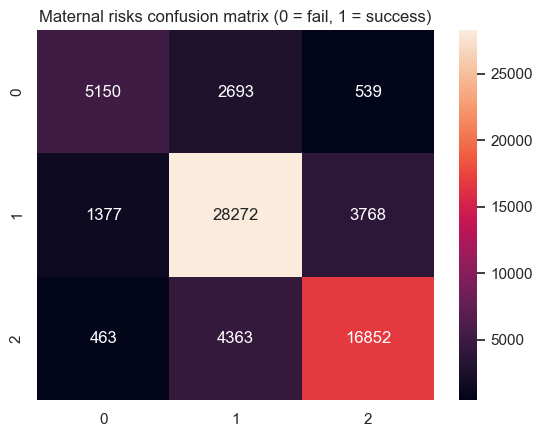

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = fail, 1 = success)')

print(classification_report(y_test,y_pred))
#Vertical (actual), horizontal (prediction)

In [11]:
# Categories Accuracy
a,b,c = (cm.diagonal()/cm.sum(axis=1))*100
print ("Low :", a,
       "\nNormal:", b,
       "\nHigh:", c)


Low : 61.44118348842758 
Normal: 84.60364485142293 
High: 77.73779868991605


In [12]:
importances = rf_model.feature_importances_
columns = X.columns
i = 0

while i < len(columns):
    print (f" the importance of feature '{columns[i]}' is {round(importances[i]*100, 2)}%.")
    i+=1

 the importance of feature 'Brand' is 3.75%.
 the importance of feature 'Unit' is 0.92%.
 the importance of feature 'Job_type' is 3.76%.
 the importance of feature 'Subject' is 5.66%.
 the importance of feature 'Language_Pair' is 13.05%.
 the importance of feature 'Start_TimeStamp' is 10.29%.
 the importance of feature 'Price' is 14.1%.
 the importance of feature 'Deivery_TimeStamp' is 10.05%.
 the importance of feature 'amount' is 10.87%.
 the importance of feature 'Duration' is 9.01%.
 the importance of feature 'PM' is 5.33%.
 the importance of feature 'Account' is 13.21%.


In [13]:
dfn1 = pd.DataFrame(prob, columns=["Low", "Normal", "High"])
dfn1['y_pred'] = y_pred
dfn1['y_test'] = y_test

dfn1

,Low,Normal,High,y_pred,y_test
0,0.01,0.12,0.87,2,2
1,0.02,0.07,0.91,2,2
2,0.67,0.33,0.00,0,0
3,0.01,0.98,0.01,1,1
4,0.29,0.56,0.15,1,1
...,...,...,...,...,...
63472,0.04,0.12,0.84,2,1
63473,0.12,0.33,0.55,2,2
63474,0.01,0.07,0.92,2,1
63475,0.02,0.43,0.55,2,2


In [14]:
dfn1['25_pred'] = np.where((dfn1['Low'] >= 0.25) , 0, dfn1['y_pred'])

dfn1

,Low,Normal,High,y_pred,y_test,25_pred
0,0.01,0.12,0.87,2,2,2
1,0.02,0.07,0.91,2,2,2
2,0.67,0.33,0.00,0,0,0
3,0.01,0.98,0.01,1,1,1
4,0.29,0.56,0.15,1,1,0
...,...,...,...,...,...,...
63472,0.04,0.12,0.84,2,1,2
63473,0.12,0.33,0.55,2,2,2
63474,0.01,0.07,0.92,2,1,2
63475,0.02,0.43,0.55,2,2,2


In [15]:
dfn1.to_excel("C://Users//ahmed.saeed//Desktop//Job_Risk//Job_Risk//Profitability//RF_Profitability.xlsx", header=True)

              precision    recall  f1-score   support

           0       0.74      0.61      0.67      8382
           1       0.80      0.85      0.82     33417
           2       0.80      0.78      0.79     21678

    accuracy                           0.79     63477
   macro avg       0.78      0.75      0.76     63477
weighted avg       0.79      0.79      0.79     63477



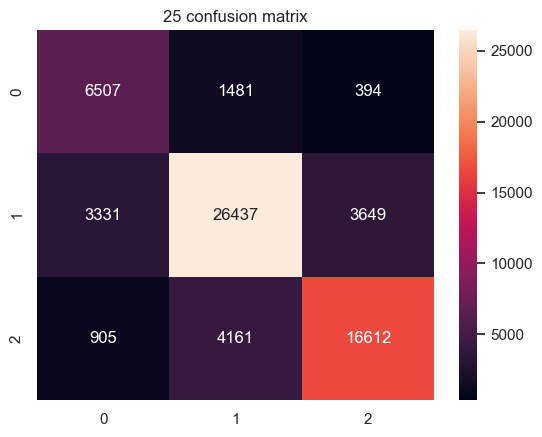

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
cm25 = confusion_matrix(y_test, dfn1['25_pred'])
sns.heatmap(cm25, annot=True, fmt='d').set_title('25 confusion matrix')

print(classification_report(y_test,y_pred))
#Vertical (actual), horizontal (prediction)

In [17]:
# Categories Accuracy
a,b,c = (cm25.diagonal()/cm25.sum(axis=1))*100
print ("Low :", a,
       "\nNormal:", b,
       "\nHigh:", c)

Low : 77.63063707945598 
Normal: 79.11242780620643 
High: 76.63068548759111


In [18]:
# final Prediction (low @ 25%)